In [1]:
import numpy as np
import pandas as pd
#import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
#import statsmodels.api as sm
from sklearn.metrics import r2_score

import seaborn as sn

In [2]:
df=pd.read_csv("datset_phones.csv")

In [3]:
df

,Year,Model,Price,buy
0,2010,1.10,120,no
1,2011,1.20,150,no
2,2011,1.80,160,no
3,2012,2.00,145,no
4,2012,2.10,150,no
5,2012,2.40,160,no
6,2013,2.60,190,no
7,2013,2.80,210,no
8,2014,2.90,220,no
9,2014,3.00,200,no


In [4]:
X=df[['Year','Price']]
Y=df['buy']

In [5]:
df['ifBuy']=(df['buy'].map({'yes':1,'no':0}))

In [6]:
df

,Year,Model,Price,buy,ifBuy
0,2010,1.10,120,no,0
1,2011,1.20,150,no,0
2,2011,1.80,160,no,0
3,2012,2.00,145,no,0
4,2012,2.10,150,no,0
5,2012,2.40,160,no,0
6,2013,2.60,190,no,0
7,2013,2.80,210,no,0
8,2014,2.90,220,no,0
9,2014,3.00,200,no,0


In [7]:
df['Year'][7]

2013

In [8]:
w0=1
w1=1
w2=1
w3=1
alpha=0.005
epochs=10000
for i in range(0,epochs):
    for j in range(0,df.shape[0]):
        sum=w0*(-100)+w1*df['Year'][j]+w2*df['Model'][j]+w3*df['Price'][j]
        # print(sum)
        if sum>=0:
            pred=1
        else:
            pred=0
        delta=alpha*(df['ifBuy'][j]-pred)
        # print(i,j," : ",delta)
        w0=w0-delta
        w1=w1+delta*df['Year'][j]
        w2=w2+delta*df['Model'][j]
        w3=w3+delta*df['Price'][j]

df['preds']=w0+w1*df['Year']+w2*df['Model']+w3*df['Price']
df['preds']=(df['preds'] >=0).astype(int)
print(df)
print(w0,w1,w2,w3)

    Year  Model  Price  buy  ifBuy  preds
0   2010   1.10    120   no      0      0
1   2011   1.20    150   no      0      0
2   2011   1.80    160   no      0      0
3   2012   2.00    145   no      0      0
4   2012   2.10    150   no      0      0
5   2012   2.40    160   no      0      0
6   2013   2.60    190   no      0      0
7   2013   2.80    210   no      0      0
8   2014   2.90    220   no      0      0
9   2014   3.00    200   no      0      0
10  2015   3.10    210   no      0      0
11  2015   3.20    215  yes      1      0
12  2016   3.30    220  yes      1      0
13  2016   3.40    260   no      0      0
14  2017   3.50    270   no      0      0
15  2017   3.70    280   no      0      0
16  2018   4.00    250  yes      1      0
17  2018   4.20    264  yes      1      0
18  2018   4.40    270  yes      1      0
19  2019   4.60    282   no      0      0
20  2019   4.70    295   no      0      0
21  2020   4.80    303   no      0      0
22  2020   4.82    312   no      0

In [9]:
w0=1
w1=1
w2=1
# w3=1
alpha=0.005
epochs=10000
for i in range(0,epochs):
    for j in range(0,df.shape[0]):
        sum=w0*(-100)+w1*df['Year'][j]+w2*df['Price'][j]
        # print(sum)
        if sum>=0:
            pred=1
        else:
            pred=0
        delta=alpha*(df['ifBuy'][j]-pred)
        # print(i,j," : ",delta)
        w0=w0-delta
        w1=w1+delta*df['Year'][j]
        w2=w2+delta*df['Price'][j]

df['preds']=w0+w1*df['Year']+w2*df['Price']
df['preds']=(df['preds'] >=0).astype(int)
print(df.iloc[2:13])

    Year  Model  Price  buy  ifBuy  preds
2   2011    1.8    160   no      0      0
3   2012    2.0    145   no      0      0
4   2012    2.1    150   no      0      0
5   2012    2.4    160   no      0      0
6   2013    2.6    190   no      0      0
7   2013    2.8    210   no      0      0
8   2014    2.9    220   no      0      0
9   2014    3.0    200   no      0      0
10  2015    3.1    210   no      0      0
11  2015    3.2    215  yes      1      0
12  2016    3.3    220  yes      1      0


In [15]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

print(accuracy_score(df['ifBuy'],df['preds']))
print(r2_score(df['ifBuy'],df['preds']))
print(mean_squared_error(df['ifBuy'],df['preds']))

0.6666666666666666
-0.4354066985645939
0.3333333333333333


In [10]:
def pred(year,price):
    pred=w0+w1*year+w2*price
    if pred>=0:
        return "yes"
    else:
        return "no"
        

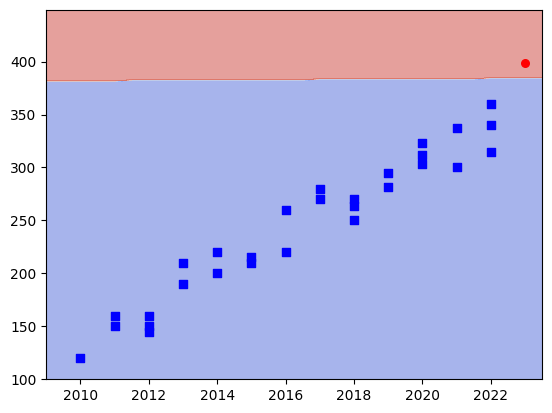

In [11]:
k=5
xx, yy = np.meshgrid(np.arange(2009, 2024, 0.5), np.arange(100, 450, 1))
zz = np.array([pred(x, y)=='yes' for x, y in zip(xx.ravel(), yy.ravel())])
zz = zz.reshape(xx.shape)
# print(zz)
fig, ax = plt.subplots()
ax.contourf(xx, yy, zz, cmap='coolwarm', alpha=0.5)

colors = {'yes': 'red', 'no': 'blue'}
markers = {'yes': 'o', 'no': 's'}
for i, row in df.iterrows():
    ax.scatter(row['Year'], row['Price'], c=colors[pred(row['Year'], row['Price'])], marker=markers[pred(row['Year'], row['Price'])], s=30)
plt.show()

In [12]:
class Perceptron:
    def __init__(self, input_size, lr=0.1, epochs=10):
        self.W = np.zeros(input_size+1)
        self.epochs = epochs
        self.lr = lr

    def activation_fn(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        x = np.insert(x, 0, 1)
        z = self.W.T.dot(x)
        a = self.activation_fn(z)
        return a

    def fit(self, X, d):
        for _ in range(self.epochs):
            for i in range(d.shape[0]):
                x = X[i]
                y = self.predict(x)
                e = d[i] - y
                x = np.insert(x, 0, 1)
                self.W = self.W + self.lr * e * x

X = np.array([
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])

d = np.array([0, 0, 0, 1])

perceptron = Perceptron(input_size=3)
perceptron.fit(X, d)

print("Weights:", perceptron.W)


Weights: [-0.1 -0.1  0.1  0.1]


In [13]:
import numpy as np

# Define the input data as a 2D NumPy array
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])

# Define the output labels as a 1D NumPy array
y = np.array([0, 0, 1, 1])

# Define the weights as a 1D NumPy array
w = np.array([0, 0, 0])

# Define the learning rate
lr = 0.1

# Define the activation function (here we use the step function)
def step_function(z):
    return np.where(z >= 0, 1, 0)

# Define the prediction function
def predict(X, w):
    z = np.dot(X, w)
    a = step_function(z)
    return a

# Define the training function
def train(X, y, w, lr, n_epochs):
    for epoch in range(n_epochs):
        # Make a prediction with the current weights
        y_pred = predict(X, w)
        
        # Calculate the error between the predicted and actual outputs
        error = y - y_pred
        
        # Update the weights based on the error and learning rate
        w += lr * np.dot(X.T, error)
        
    return w

# Train the perceptron for 100 epochs
w_trained = train(X, y, w, lr, n_epochs=100)

# Print the trained weights
print("Trained weights:", w_trained)

# Make a prediction with the trained weights
y_pred = predict(X, w_trained)

# Print the predicted outputs
print("Predicted outputs:", y_pred)


UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'